# Homework 1
### Inflation timeseries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
raw_df=pd.read_csv('us-infl.csv',names=['Month', 'Inflation (USD)'], index_col=0, header=0 )

In [3]:
raw_df

,Inflation (USD)
Month,
1,0.44
2,0.77
3,0.60
4,-0.22
5,-0.16
...,...
176,0.30
177,0.53
178,-0.06


In [4]:
newdf=pd.Series(data=raw_df['Inflation (USD)'].values, index=pd.date_range(start='2005-01-01',end='2020-01-01',freq='M'))

In [5]:
newdf

2005-01-31    0.44
2005-02-28    0.77
2005-03-31    0.60
2005-04-30   -0.22
2005-05-31   -0.16
              ... 
2019-08-31    0.30
2019-09-30    0.53
2019-10-31   -0.06
2019-11-30    0.00
2019-12-31   -0.06
Freq: M, Length: 180, dtype: float64

Text(0,0.5,'Inflation (USD)')

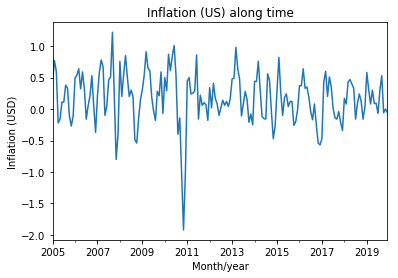

In [6]:
newdf.plot()
plt.title("Inflation (US) along time")
plt.xlabel("Month/year")
plt.ylabel("Inflation (USD)")

In [7]:
#Is there any trend?
#No
#Is there seasonality?
#Kind of?...

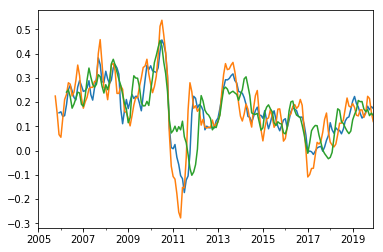

In [14]:
newdf.rolling(12).mean().plot()
newdf.rolling(10).mean().plot()
newdf.rolling(16).mean().plot()

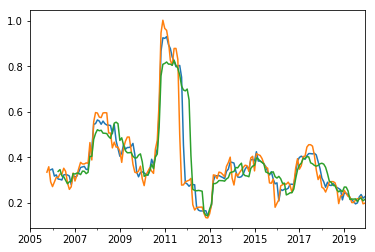

In [16]:
newdf.rolling(12).std().plot()
newdf.rolling(10).std().plot()
newdf.rolling(16).std().plot()

In [9]:
#Check for stationarity: Augmented Dickey Fuller test

In [10]:
def check_stationarity(timeseries):
    raw_res=adfuller(timeseries,autolag='AIC')[0:4]
    final_res=pd.Series(raw_res, index=['Test statistic', 'P-value','Lags used','Number of values'] )
    return final_res
check_stationarity(newdf)

Test statistic     -7.513957e+00
P-value             3.948120e-11
Lags used           0.000000e+00
Number of values    1.790000e+02
dtype: float64

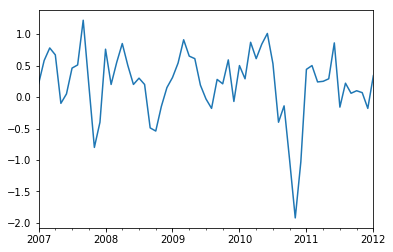

In [23]:
newdf['2007-01-31':'2012-01-31'].plot()

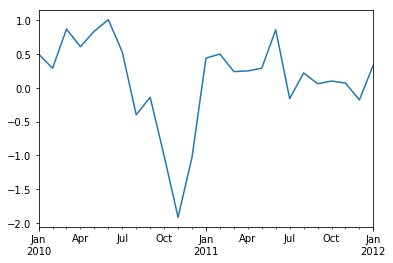

In [26]:
newdf['2010-01-31':'2012-01-31'].plot()

In [34]:
80

0.05555555555555555

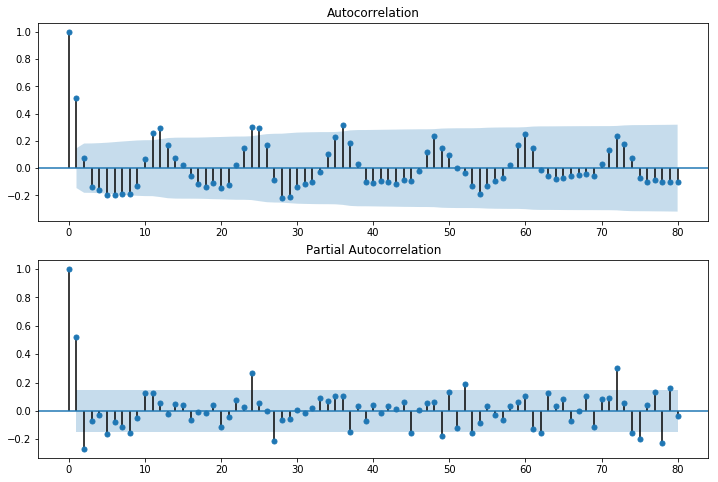

In [40]:
#lags  é o numero de janelas
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(newdf, lags=80, ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(newdf, lags=80, ax=ax2)

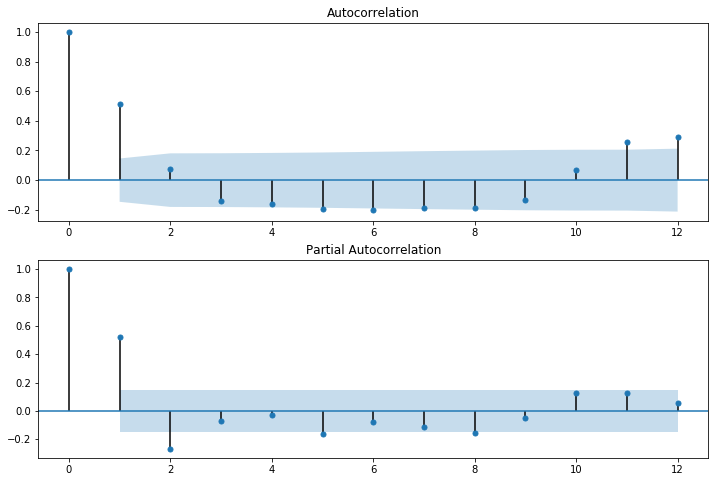

In [51]:
#lags  é o numero de janelas
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(newdf, lags=12, ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(newdf, lags=12, ax=ax2)

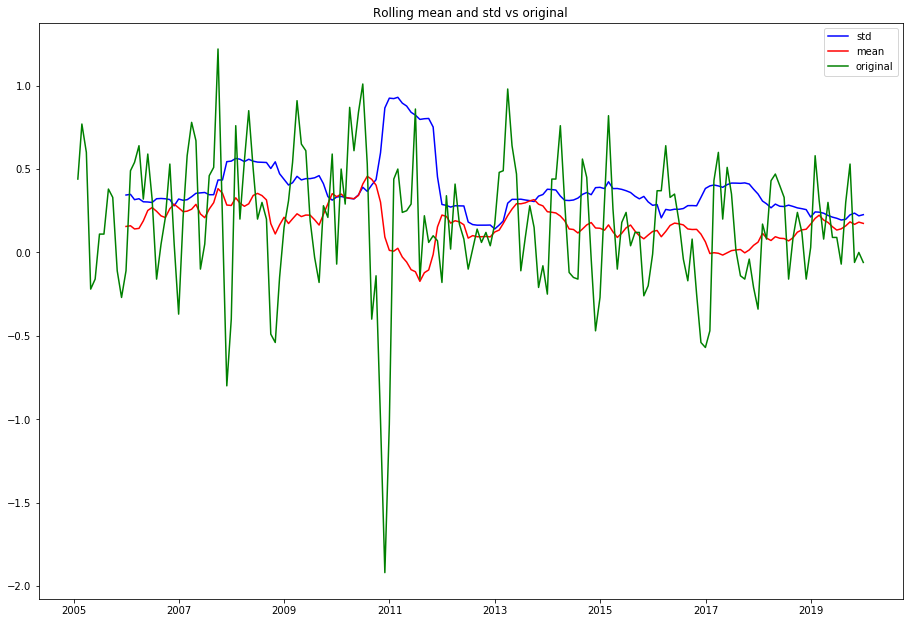

In [50]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_axes([0,0,1,1])
ax.set_title("Rolling mean and std vs original")
#(['Std', 'Mean', 'Original'])
ax.plot(newdf.rolling(12).std(), color='blue', label='std')
ax.plot(newdf.rolling(12).mean(), color='red', label='mean')
ax.plot(newdf, color='green', label='original')
ax.legend(loc='best')